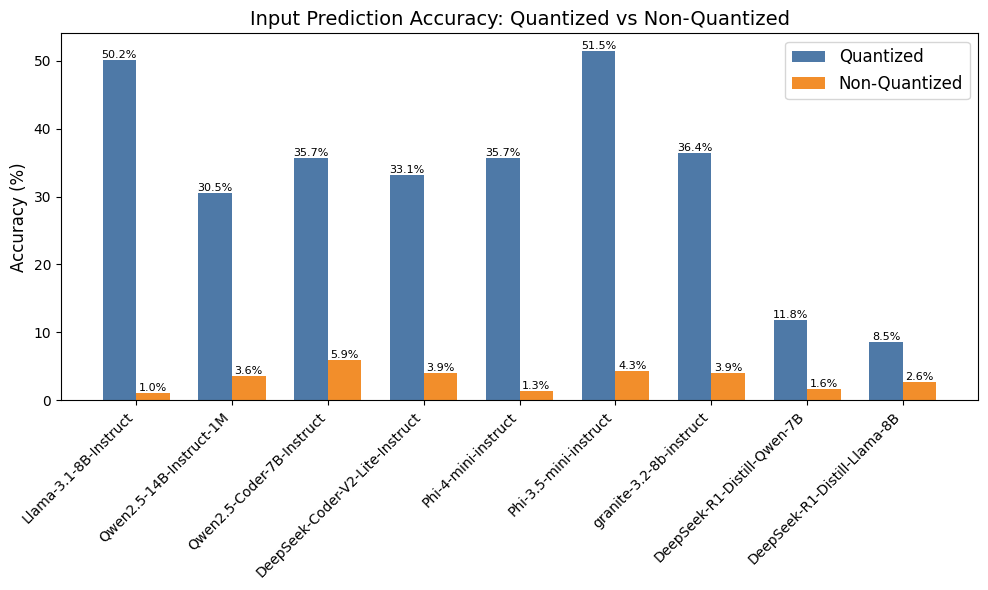

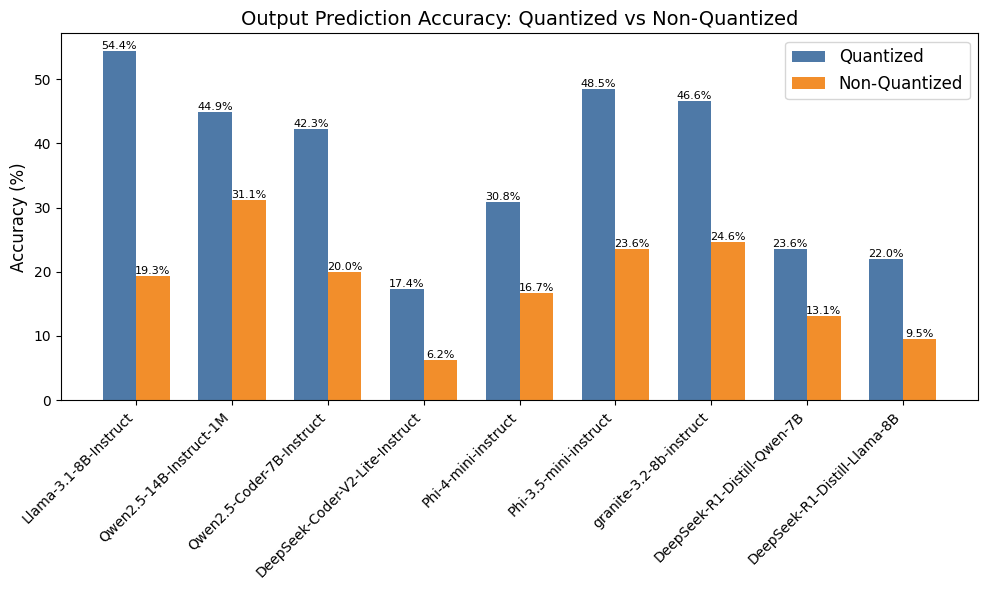

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load your data
with open('input_output_predictions.json', 'r') as f:
    data = json.load(f)

# Prepare data for input prediction
models = []
input_quantized_yes = []
input_quantized_no = []
output_quantized_yes = []
output_quantized_no = []

for model in data:
    models.append(model)
    # Input prediction accuracies
    input_quantized_yes.append(data[model]["quantized_yes"]["pt4"]["python"]["input"]["shot3"]["overall_accuracy"] * 100)
    input_quantized_no.append(data[model]["quantized_no"]["pt4"]["python"]["input"]["shot3"]["overall_accuracy"] * 100)
    # Output prediction accuracies
    output_quantized_yes.append(data[model]["quantized_yes"]["pt4"]["python"]["output"]["shot3"]["overall_accuracy"] * 100)
    output_quantized_no.append(data[model]["quantized_no"]["pt4"]["python"]["output"]["shot3"]["overall_accuracy"] * 100)

# Function to create a comparison plot
def create_comparison_plot(models, quant_yes, quant_no, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    x = np.arange(len(models))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, quant_yes, width, label='Quantized', color='#4e79a7')
    bars2 = plt.bar(x + width/2, quant_no, width, label='Non-Quantized', color='#f28e2b')
    
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(x, models, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}%',
                     ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Plot 1: Input prediction comparison
create_comparison_plot(
    models=models,
    quant_yes=input_quantized_yes,
    quant_no=input_quantized_no,
    title="Input Prediction Accuracy: Quantized vs Non-Quantized"
)

# Plot 2: Output prediction comparison
create_comparison_plot(
    models=models,
    quant_yes=output_quantized_yes,
    quant_no=output_quantized_no,
    title="Output Prediction Accuracy: Quantized vs Non-Quantized"
)